In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
l = [f"{x}" for x in range(1,786)]
df = pd.read_csv('all.csv',names=l)

In [3]:
df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,785
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df['785'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [5]:
df.shape

(3000, 785)

In [6]:
X = df.drop('785',axis=1)

In [7]:
X[1:2]

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Printing digits from data set 

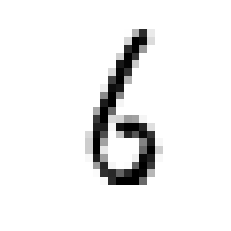

In [8]:
some_digit = np.array(X[2003:2004])
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.savefig('6.png', bbox_inches='tight')
plt.show()


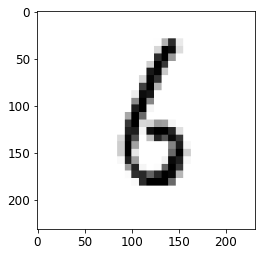

In [9]:
import matplotlib.image as mpimg
img = mpimg.imread('6.png')
imgplot = plt.imshow(img)
plt.show()

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('785',axis=1)
y = df['785']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [13]:
X_train.shape

(2700, 784)

In [14]:
y_train.shape

(2700,)

In [15]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[784]),
keras.layers.Dropout(rate=0.04),
keras.layers.Dense(900, activation="relu"),
keras.layers.Dropout(rate=0.24),
keras.layers.Dense(500, activation="relu"),
keras.layers.Dropout(rate=0.24),
keras.layers.Dense(400, activation="relu"),
keras.layers.Dropout(rate=0.12),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dropout(rate=0.09),
keras.layers.Dense(10, activation="softmax")
])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 900)               706500    
                                                                 
 dropout_1 (Dropout)         (None, 900)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               450500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               2

In [17]:
#Multiclass classification || labels are integer values || using sparse
#cross entroy loss function
epochs=10
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
              metrics='accuracy')
#0.00157

# Training and validation data split

In [18]:
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train,
                                           test_size=0.1)

In [19]:
X_trainn.shape

(2430, 784)

In [20]:
X_val.shape

(270, 784)

In [21]:
history = model.fit(X_trainn, y_trainn, epochs=58,
                    validation_data=(X_val, y_val),batch_size=30)


Epoch 1/58
81/81 [==============================] - 2s 14ms/step - loss: 19.3337 - accuracy: 0.3366 - val_loss: 2.1418 - val_accuracy: 0.6407
Epoch 2/58
81/81 [==============================] - 1s 13ms/step - loss: 5.3172 - accuracy: 0.4992 - val_loss: 1.5281 - val_accuracy: 0.7333
Epoch 3/58
81/81 [==============================] - 1s 16ms/step - loss: 3.4071 - accuracy: 0.5868 - val_loss: 0.9538 - val_accuracy: 0.7593
Epoch 4/58
81/81 [==============================] - 1s 13ms/step - loss: 2.4498 - accuracy: 0.6095 - val_loss: 0.8346 - val_accuracy: 0.7815
Epoch 5/58
81/81 [==============================] - 1s 12ms/step - loss: 1.8479 - accuracy: 0.6436 - val_loss: 0.7792 - val_accuracy: 0.7630
Epoch 6/58
81/81 [==============================] - 1s 12ms/step - loss: 1.5377 - accuracy: 0.6444 - val_loss: 0.6763 - val_accuracy: 0.8037
Epoch 7/58
81/81 [==============================] - 1s 12ms/step - loss: 1.2474 - accuracy: 0.6852 - val_loss: 0.6955 - val_accuracy: 0.7852
Epoch 8/58
8

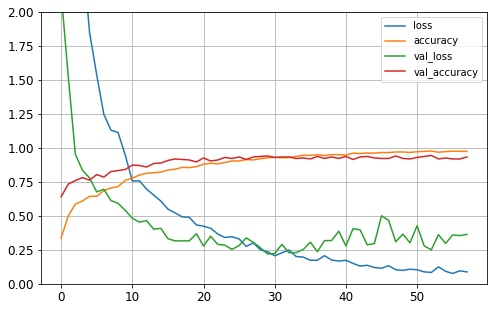

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,2) # set the vertical range to [0-1]
plt.show()

In [23]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 5ms/step - loss: 0.5042 - accuracy: 0.9333


[0.5041508674621582, 0.9333333373069763]

In [24]:
#model.save(filepath="model2/")

In [25]:
y_hat=model.predict(x=X_test[2:3])

1/1 [==============================] - 0s 87ms/step


In [26]:
list(y_hat[0]).index(y_hat[0][y_hat[0]==max(y_hat[0])][0])

7

In [27]:
y_test[2:3]

2142    7
Name: 785, dtype: int64

# Misclassified observations

In [28]:
indexx=[]
for i in range(300):
    y_hat=model.predict(x=X_test[i:(1+i)])
    indexx.append(list(y_hat[0]).index(y_hat[0][y_hat[0]==max(y_hat[0])][0]))
    

1/1 [==============================] - 0s 18ms/step


In [29]:
misc=[]
for i in range(300):
    if indexx[i] != int(y_test[i:(i+1)]):
        misc.append(i)

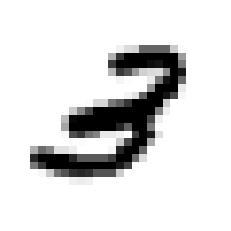

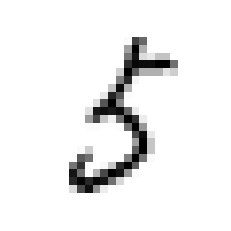

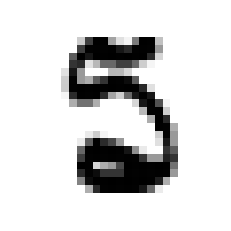

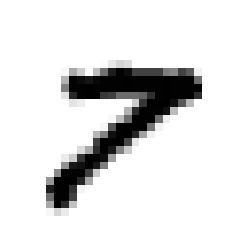

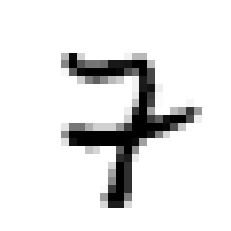

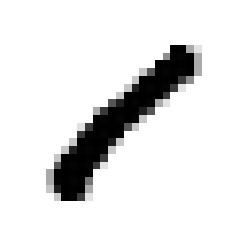

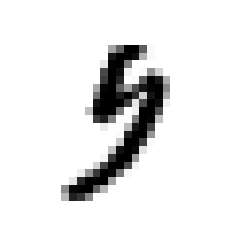

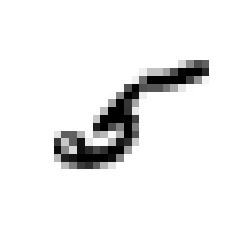

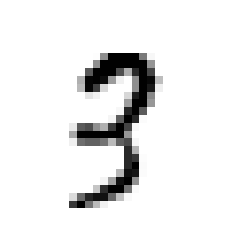

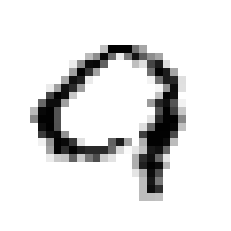

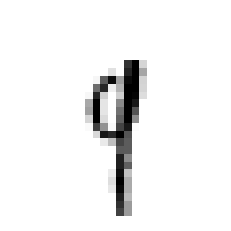

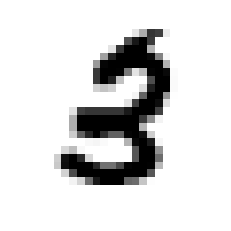

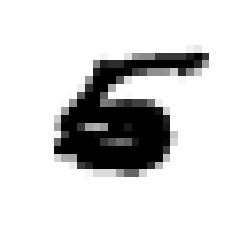

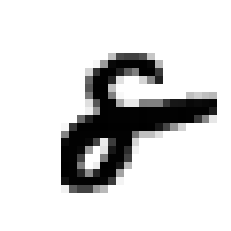

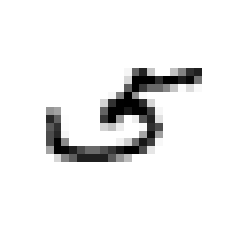

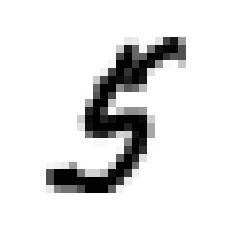

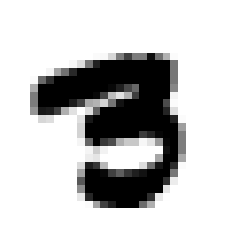

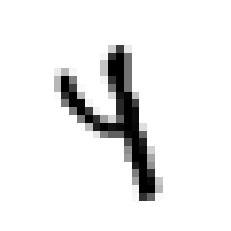

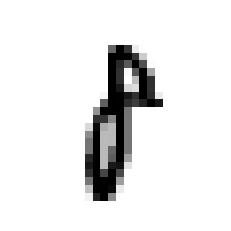

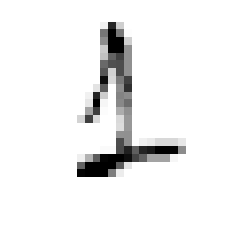

In [30]:
for i in misc:
    some_digit = np.array(X_test[i:(i+1)])
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
    plt.axis("off")
    plt.show()

# With PCA data

In [159]:
l = [f'{x}' for x in range(26)]
dfp = pd.read_csv('feat_25.csv',names=l)

In [160]:
dfp

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.654304,-0.545767,-0.933080,0.519976,-2.320598,1.367332,0.054777,-1.950538,0.544212,-1.075651,...,1.170660,0.103834,0.459804,-1.044173,0.977424,-0.344050,1.610031,-0.425905,-0.563896,0.0
1,1.143184,0.206634,-0.483264,-1.615974,-1.813212,0.637231,2.370469,0.037484,1.098836,-1.183758,...,1.810244,-1.163106,-1.493243,-0.012443,-0.470192,-0.390559,-0.164660,0.120084,-1.161470,0.0
2,3.016369,0.047395,1.230139,0.011447,-1.670743,-1.158001,0.632818,-0.662665,-0.339282,-0.588839,...,-0.968032,-0.588385,-0.025694,0.043960,0.977063,-0.070138,1.186279,-0.871176,2.040408,0.0
3,0.625194,0.072500,-0.114529,-1.490145,-2.485835,0.354404,0.946991,0.191958,1.053374,-0.190401,...,1.744193,-1.427185,-1.464317,1.012185,-0.706599,-0.017813,-0.828093,2.364627,-0.349696,0.0
4,0.580433,0.572713,-1.026761,-1.796701,-0.256098,0.828793,1.780351,0.405128,2.373261,-1.080473,...,0.520433,-0.599256,0.438023,1.113932,-0.344528,1.504522,3.462207,-2.199379,-2.824360,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.456653,1.729727,0.399702,0.319964,-0.607337,-0.087839,-0.291162,-0.465680,0.151494,1.558289,...,1.564065,-0.198223,-0.081220,-0.592329,1.066769,-0.587324,-0.739663,-0.054173,-1.335516,9.0
2996,-0.508929,1.847698,0.737128,0.794907,0.869302,-1.242668,0.992115,-0.082615,0.830351,-0.144912,...,-1.121559,0.157768,1.029099,0.894957,0.327257,0.424843,0.156973,0.863057,-0.734006,9.0
2997,-0.941072,0.865362,-0.924921,-0.135205,-0.293020,-1.002599,-0.266469,-0.261606,-0.515560,-0.907709,...,0.248317,-0.035346,0.396430,-1.408675,1.209539,-0.744626,-0.070772,0.789985,-0.033393,9.0
2998,-0.462417,1.418198,-1.415659,0.634069,0.850680,-0.925182,-0.159660,0.583575,0.684680,-1.165339,...,0.366578,0.809446,-1.218773,-1.135803,1.154675,-0.024268,0.400686,-0.342591,0.143127,9.0


In [161]:
X = dfp.drop('25',axis=1)
y = dfp['25']

In [162]:
X.shape

(3000, 25)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [164]:
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train,
                                           test_size=0.1)

In [165]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[25]),
keras.layers.Dropout(rate=0.1),
keras.layers.Dense(200, activation="relu"),
keras.layers.Dropout(rate=0.1),
keras.layers.Dense(150, activation="relu"),
keras.layers.Dropout(rate=0.1),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dropout(rate=0.01),
keras.layers.Dense(80, activation="relu"),
keras.layers.Dropout(rate=0.01),
keras.layers.Dense(10, activation="softmax")
])


In [166]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 25)                0         
                                                                 
 dropout_40 (Dropout)        (None, 25)                0         
                                                                 
 dense_40 (Dense)            (None, 200)               5200      
                                                                 
 dropout_41 (Dropout)        (None, 200)               0         
                                                                 
 dense_41 (Dense)            (None, 150)               30150     
                                                                 
 dropout_42 (Dropout)        (None, 150)               0         
                                                                 
 dense_42 (Dense)            (None, 100)              

In [167]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.000157),
              metrics='accuracy')

In [168]:
history = model.fit(X_trainn, y_trainn, epochs=150,
                    validation_data=(X_val, y_val))


Epoch 1/150
76/76 [==============================] - 1s 6ms/step - loss: 2.2380 - accuracy: 0.2198 - val_loss: 2.1058 - val_accuracy: 0.5148
Epoch 2/150
76/76 [==============================] - 0s 6ms/step - loss: 1.9670 - accuracy: 0.4802 - val_loss: 1.6169 - val_accuracy: 0.7444
Epoch 3/150
76/76 [==============================] - 0s 3ms/step - loss: 1.4026 - accuracy: 0.6749 - val_loss: 0.9142 - val_accuracy: 0.8370
Epoch 4/150
76/76 [==============================] - 0s 3ms/step - loss: 0.9371 - accuracy: 0.7432 - val_loss: 0.5827 - val_accuracy: 0.8741
Epoch 5/150
76/76 [==============================] - 0s 3ms/step - loss: 0.7214 - accuracy: 0.7901 - val_loss: 0.4450 - val_accuracy: 0.9074
Epoch 6/150
76/76 [==============================] - 0s 3ms/step - loss: 0.6201 - accuracy: 0.8119 - val_loss: 0.3935 - val_accuracy: 0.8889
Epoch 7/150
76/76 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.8214 - val_loss: 0.3740 - val_accuracy: 0.8926
Epoch 8/150
7

Epoch 59/150
76/76 [==============================] - 0s 3ms/step - loss: 0.1621 - accuracy: 0.9449 - val_loss: 0.1779 - val_accuracy: 0.9370
Epoch 60/150
76/76 [==============================] - 0s 3ms/step - loss: 0.1729 - accuracy: 0.9403 - val_loss: 0.1751 - val_accuracy: 0.9444
Epoch 61/150
76/76 [==============================] - 0s 3ms/step - loss: 0.1606 - accuracy: 0.9407 - val_loss: 0.1719 - val_accuracy: 0.9481
Epoch 62/150
76/76 [==============================] - 0s 3ms/step - loss: 0.1618 - accuracy: 0.9494 - val_loss: 0.1915 - val_accuracy: 0.9333
Epoch 63/150
76/76 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.9449 - val_loss: 0.1896 - val_accuracy: 0.9370
Epoch 64/150
76/76 [==============================] - 0s 3ms/step - loss: 0.1673 - accuracy: 0.9395 - val_loss: 0.1764 - val_accuracy: 0.9444
Epoch 65/150
76/76 [==============================] - 0s 3ms/step - loss: 0.1628 - accuracy: 0.9490 - val_loss: 0.1841 - val_accuracy: 0.9370
Epoch 

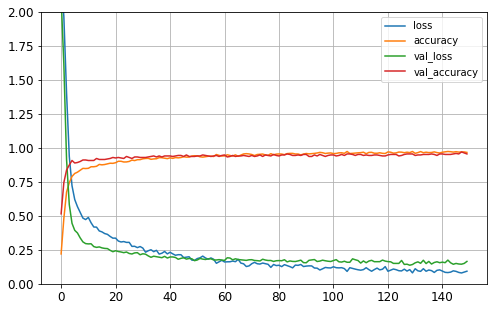

In [169]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,2) # set the vertical range to [0-1]
plt.show()

In [170]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1670 - accuracy: 0.9633


[0.16701318323612213, 0.9633333086967468]

# Mislassified observations - PCA

In [171]:
indexx=[]
for i in range(300):
    y_hat=model.predict(x=X_test[i:(1+i)])
    indexx.append(list(y_hat[0]).index(y_hat[0][y_hat[0]==max(y_hat[0])][0]))
    

1/1 [==============================] - 0s 18ms/step


In [175]:
misc=[]
for i in range(300):
    if indexx[i] != int(y_test[i:(i+1)]):
        misc.append(i)

for i in misc:
    print(int(y_test[i:(i+1)]))

5
1
9
3
7
9
9
5
5
8
4


# CNN MNIST 
### Downloading MNIST Data -Code reference Hands on ML Book

In [3]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [4]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [8]:
mnist.data.shape

(70000, 784)

In [9]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [10]:
model = keras.models.Sequential([
keras.layers.Conv2D(64, 7, activation="relu", padding="same",
input_shape=[28, 28, 1]),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(64, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation="softmax")
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [12]:
k=X[0]

In [13]:
X = X.reshape((70000,28,28,1))

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
              metrics='accuracy')

In [15]:
#train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [17]:
#train_val_split

In [18]:
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train,
                                           test_size=0.1)

In [19]:
X_trainn.shape

(56700, 28, 28, 1)

In [20]:
history = model.fit(X_trainn, y_trainn, epochs=10,
                    validation_data=(X_val, y_val), batch_size=1000)

Epoch 1/10
57/57 [==============================] - 287s 5s/step - loss: 2.0322 - accuracy: 0.3323 - val_loss: 0.8227 - val_accuracy: 0.8922
Epoch 2/10
57/57 [==============================] - 255s 4s/step - loss: 1.1425 - accuracy: 0.6074 - val_loss: 0.3022 - val_accuracy: 0.9594
Epoch 3/10
57/57 [==============================] - 255s 4s/step - loss: 0.7532 - accuracy: 0.7452 - val_loss: 0.1553 - val_accuracy: 0.9713
Epoch 4/10
57/57 [==============================] - 260s 5s/step - loss: 0.5582 - accuracy: 0.8134 - val_loss: 0.1001 - val_accuracy: 0.9765
Epoch 5/10
57/57 [==============================] - 261s 5s/step - loss: 0.4332 - accuracy: 0.8571 - val_loss: 0.0830 - val_accuracy: 0.9795
Epoch 6/10
57/57 [==============================] - 269s 5s/step - loss: 0.3544 - accuracy: 0.8830 - val_loss: 0.0679 - val_accuracy: 0.9835
Epoch 7/10
57/57 [==============================] - 265s 5s/step - loss: 0.2873 - accuracy: 0.9069 - val_loss: 0.0663 - val_accuracy: 0.9829
Epoch 8/10
57

In [21]:
model.evaluate(X_test, y_test)

219/219 [==============================] - 9s 39ms/step - loss: 0.0457 - accuracy: 0.9889


[0.04568476229906082, 0.9888571500778198]

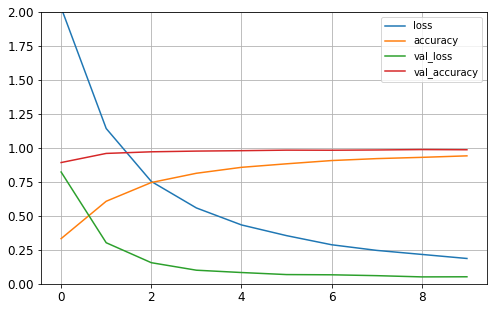

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,2) # set the vertical range to [0-1]
plt.show()

# CNN with only 2-3 layers

In [5]:
model = keras.models.Sequential([
keras.layers.Conv2D(64, 7, activation="relu", padding="same",
input_shape=[28, 28, 1]),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation="softmax")
])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [11]:
X = X.reshape((70000,28,28,1))

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
              metrics='accuracy')

In [13]:
#Train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [15]:
#Train_val_split

In [16]:
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train,
                                           test_size=0.1)

In [17]:
history = model.fit(X_trainn, y_trainn, epochs=10,
                    validation_data=(X_val, y_val), batch_size=1000)

Epoch 1/10
57/57 [==============================] - 64s 1s/step - loss: 2.9290 - accuracy: 0.5394 - val_loss: 0.3311 - val_accuracy: 0.9057
Epoch 2/10
57/57 [==============================] - 63s 1s/step - loss: 0.5911 - accuracy: 0.8037 - val_loss: 0.1971 - val_accuracy: 0.9419
Epoch 3/10
57/57 [==============================] - 63s 1s/step - loss: 0.4153 - accuracy: 0.8646 - val_loss: 0.1456 - val_accuracy: 0.9595
Epoch 4/10
57/57 [==============================] - 64s 1s/step - loss: 0.3154 - accuracy: 0.9005 - val_loss: 0.1215 - val_accuracy: 0.9638
Epoch 5/10
57/57 [==============================] - 60s 1s/step - loss: 0.2541 - accuracy: 0.9196 - val_loss: 0.1038 - val_accuracy: 0.9700
Epoch 6/10
57/57 [==============================] - 64s 1s/step - loss: 0.2180 - accuracy: 0.9321 - val_loss: 0.0981 - val_accuracy: 0.9724
Epoch 7/10
57/57 [==============================] - 64s 1s/step - loss: 0.1956 - accuracy: 0.9368 - val_loss: 0.0873 - val_accuracy: 0.9740
Epoch 8/10
57/57 [==

In [18]:
model.evaluate(X_test, y_test)

219/219 [==============================] - 3s 13ms/step - loss: 0.0665 - accuracy: 0.9820


[0.06646185368299484, 0.9819999933242798]

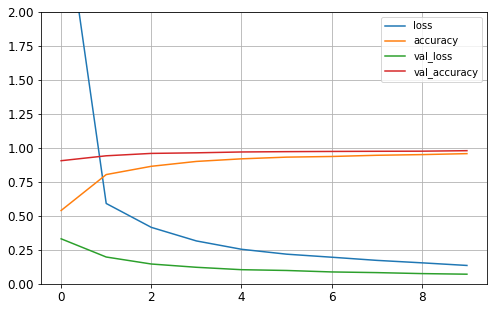

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,2) # set the vertical range to [0-1]
plt.show()